# System

In [15]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math as math
import pybinding as pb
from pybinding.repository import graphene
pb.pltutils.use_style()
from IPython.display import display, HTML

## System - important constant

In [5]:
a = 3*graphene.a_cc # lattice length.
a_cc = graphene.a_cc # carbon-carbon bond length
t = graphene.t # hopping energy of graphene.
leng = 18*graphene.a_cc #lengh of supercell
m = 0.001 
plt.rcParams.update({'font.size': 15})

## System - Bandstructure code

In [14]:
def mass_termy(V1,w1,w2,w3):
#This function makes potential difference along y axes. And it changes suddenly
    @pb.onsite_energy_modifier

    def potential(energy, sub_id,x,y):
        energy[y>=0] += V1
        energy[y<0] -= V1
        return energy
    
    return potential


def mass_termy_kink(V1,w1,w2,w3):
#This function makes potential difference along y axes. And it changes gradually
    @pb.onsite_energy_modifier
    def potential(energy, sub_id,x,y):
        yrange=w3*3*(w1+w2)*graphene.a_cc/2
        energy[y>=yrange] += V1
        energy[(y<yrange)&(y>=-yrange)] += V1/(yrange)*y[(y<yrange)&(y>=-yrange)]
        energy[y<-yrange] -= V1
        return energy

    return potential


def mass_term_siny(V1,w1,w2,w3):
#potential equals to siny
    @pb.onsite_energy_modifier

    def potential(energy, sub_id,x,y):
        energy += V1*sin(2*pi*y/(3*(w1+w2)*graphene.a_cc))
        return energy
    
    return potential

def energy(str):
    #w4 is width of none potential changnig direction
    #e1 is magnitute of the potential
    plt.figure(figsize=(20,20))
    
    #normal
    plt.subplot(231)
    solver = pb.solver.lapack(str)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [0, 0]
    K1 = [math.pi/leng*(int(inp)-1), 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-2,2)

## System - lattice

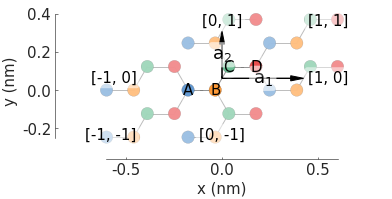

In [6]:
import math as math

def arm_chair_graphene() :
    
    lat = pb.Lattice(a1=[a,0], a2 = [0,math.sqrt(3)*a_cc]) #lattice vector
    
    lat.add_sublattices(
        ('A',[-5/4*a_cc,0/4*a_cc]),
        ('B',[-1/4*a_cc,0/4*a_cc]),
        ('C',[1/4*a_cc,2*math.sqrt(3)/4*a_cc]),
        ('D',[5/4*a_cc,2*math.sqrt(3)/4*a_cc])
        )
                        
    lat.add_hoppings(
        ([0,0], 'A', 'B', t),
        ([0,0], 'B', 'C', t),
        ([0,0], 'C', 'D', t),
        ([-1,0],'A','D',t),
        ([0,-1],'B','C',t), 
        ([1,1],'D','A',t) 
    )
    
    return lat


arm_chair = arm_chair_graphene()
arm_chair.plot()
plt.show()

## Armchair Graphene_Strtucture A

How many supercell you want to make?
2


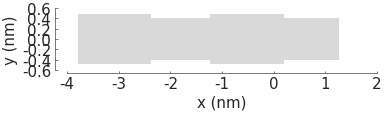

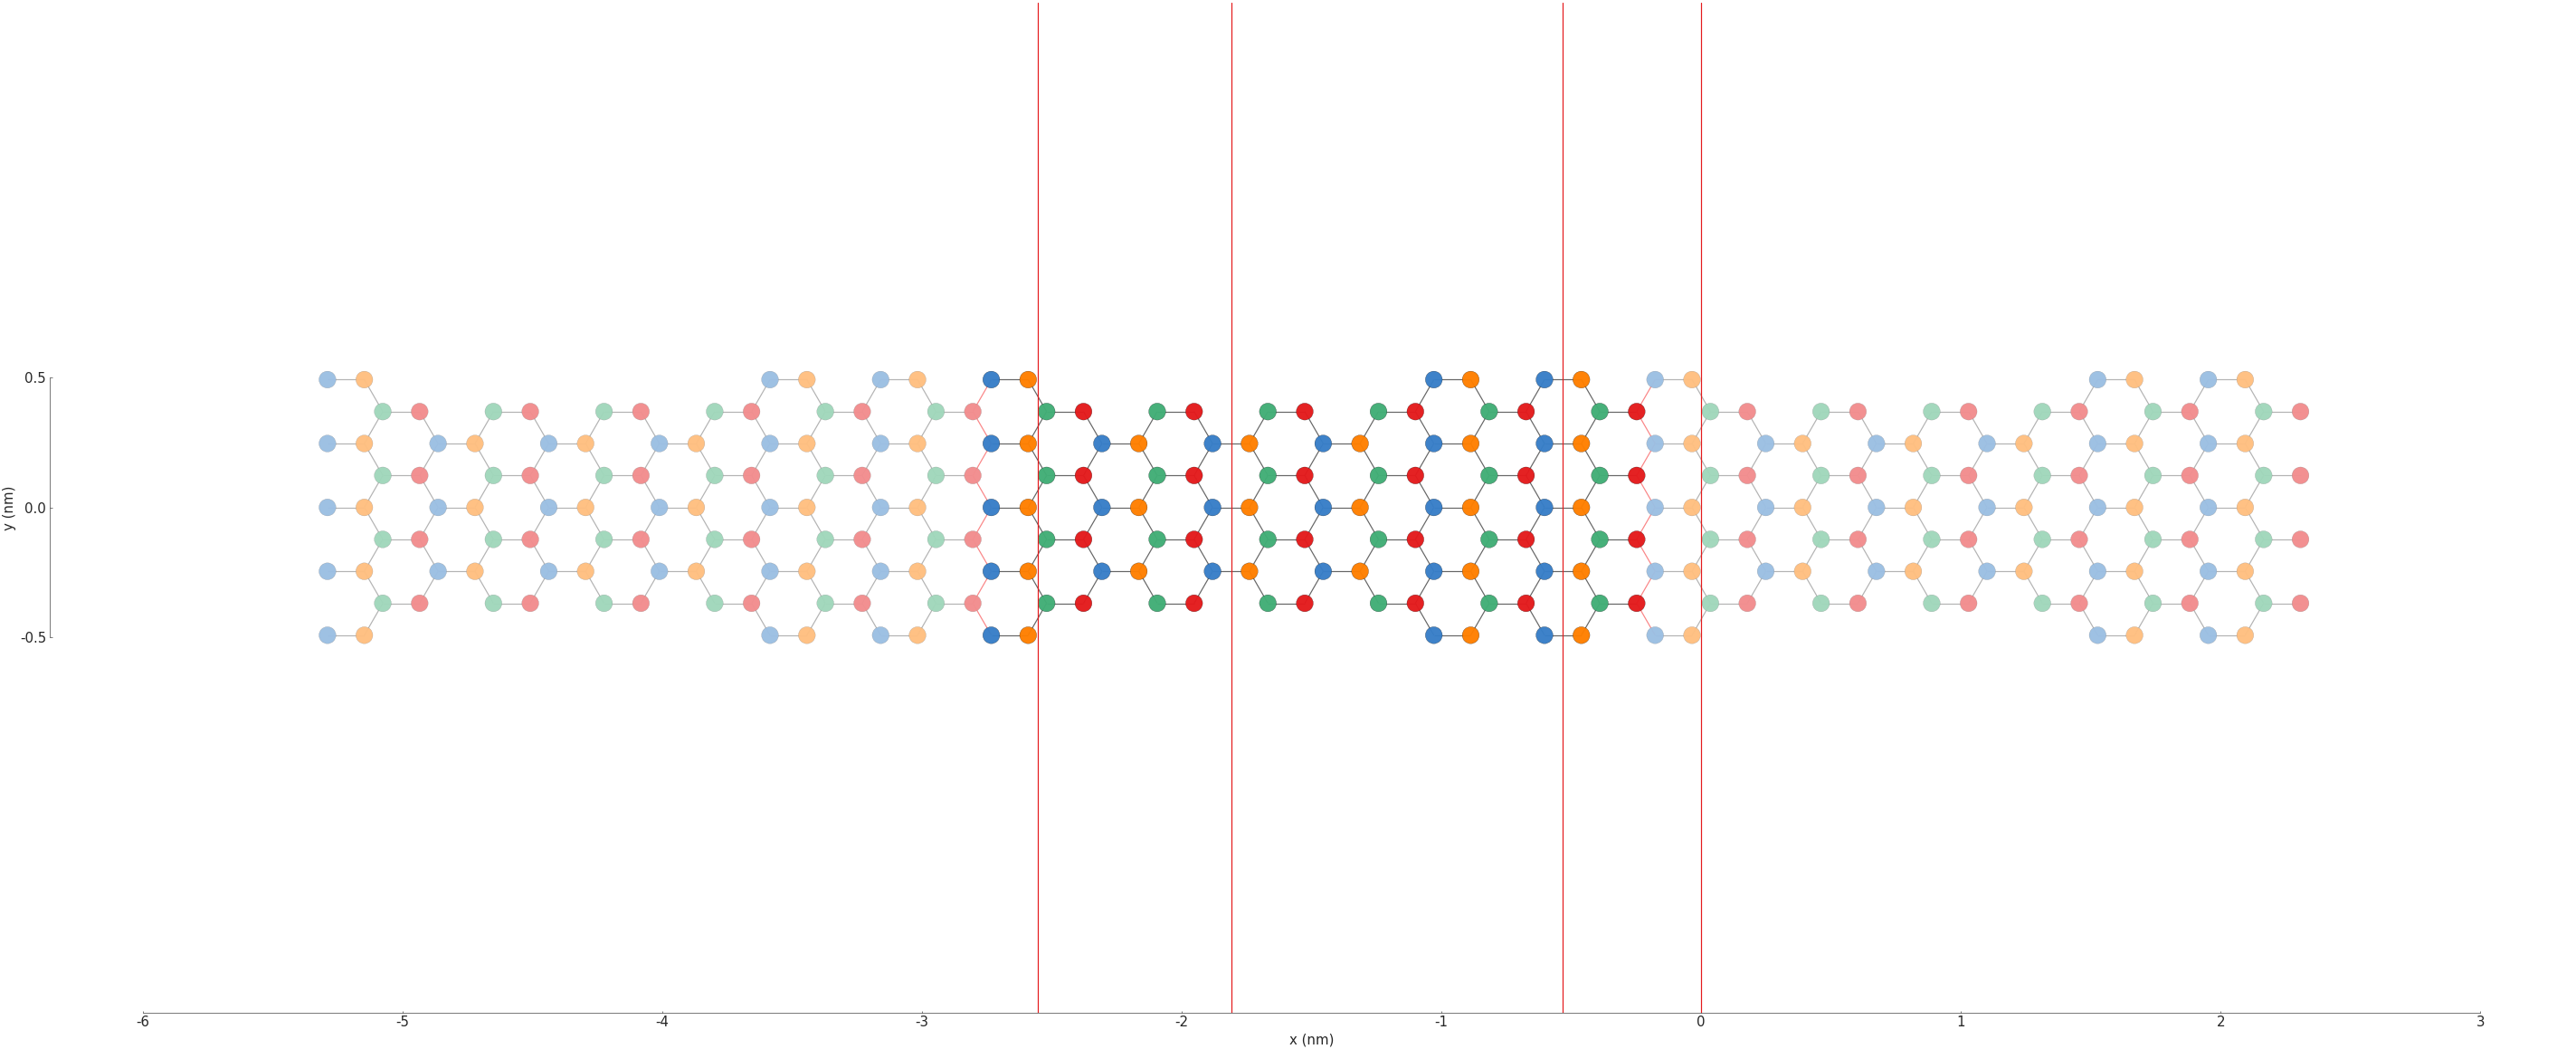

In [9]:
def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=8/2*math.sqrt(3)*a_cc+m*50) 
    rect_exc = pb.rectangle(x=3*a, y=1/2*math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1),0])
    tr_rect_down = rect_exc.with_offset([2*a+leng*(T-1), -math.sqrt(3)*2*a_cc]) #3/2*a_cc
    tr_rect_up = rect_exc.with_offset([2*a+leng*(T-1), math.sqrt(3)*2*a_cc-m]) #3/2*a_cc
    shape_1 = tr_rect - tr_rect_down -tr_rect_up

    return shape_1

supercell_A = shape(0)

print('How many supercell you want to make?')
inp = input() 


for i in range (0,int(inp)) :
    supercell_A += shape(i)
    
    
supercell_A.plot()
#arm_gra = pb.Model(lattice, shape())#,pb.translational_symmetry(a1=18*a_cc,a2=False))
#arm_gra.plot()
#arm_gra.shape.plot()

plt.figure(figsize=(50, 20.6))
plt.axvline(-5/2*(a_cc+a_cc/2),0)
plt.axvline(-12*(a_cc+a_cc/2),0)
plt.axvline(-17/2*(a_cc+a_cc/2),0)
plt.axvline(0,0)
arm_gra_A = pb.Model(arm_chair, supercell_A, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_A.plot()
#arm_gra.shape.plot()

## Armchair Graphene_Structure B

3
How many supercell_B you want to make? +1을 해주세요
2


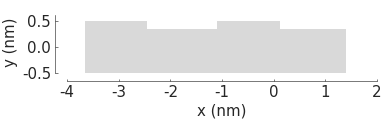

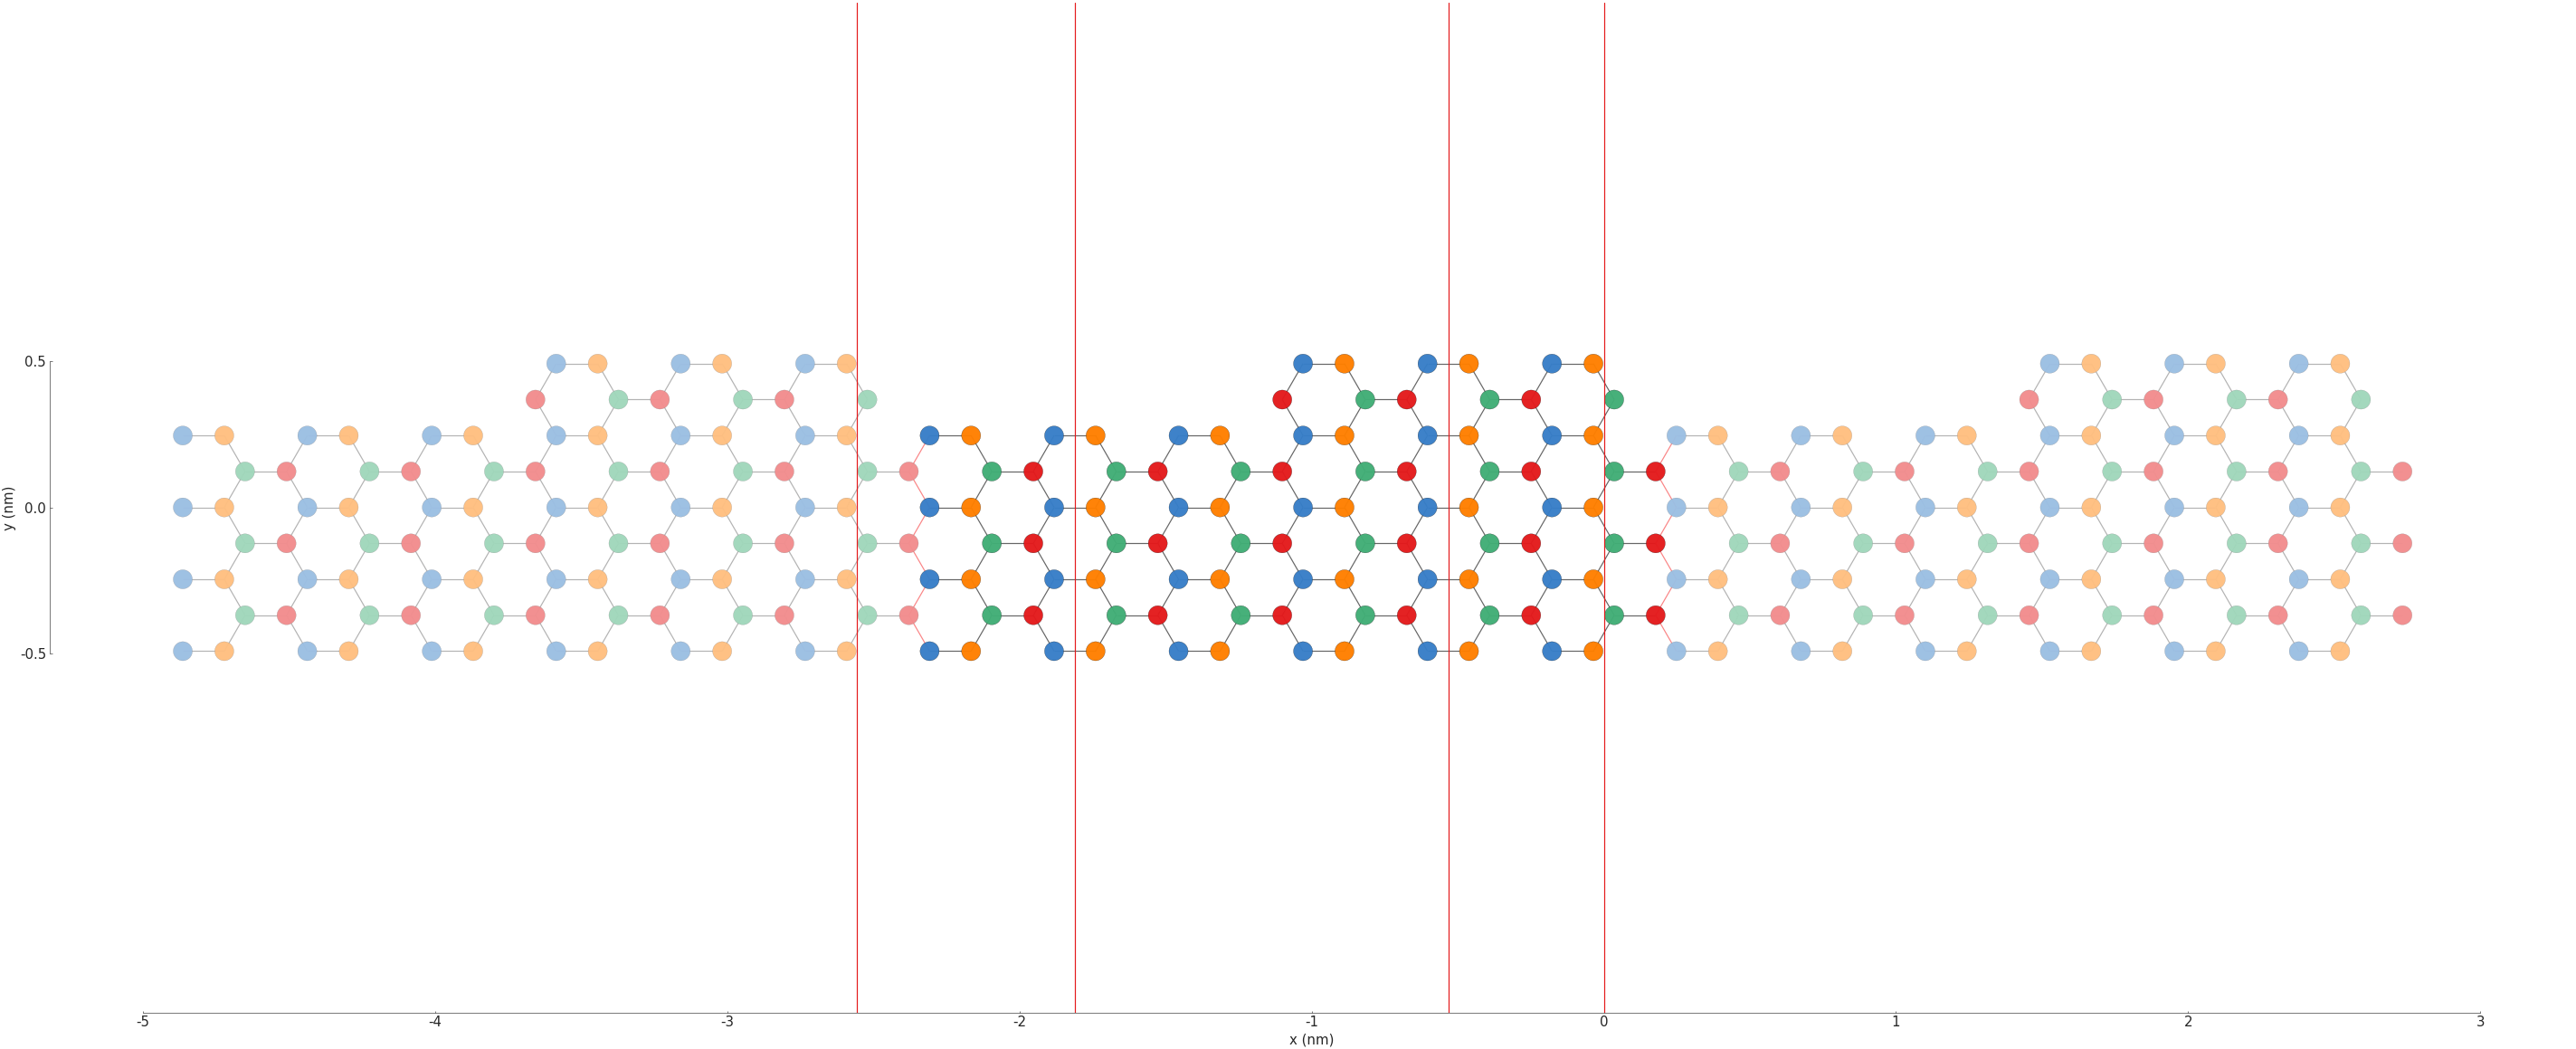

In [8]:
inp3 = input()

def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=8/2*math.sqrt(3)*a_cc+m*50) 
    rect_exc_B = pb.rectangle(x=4*a, y=math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1)+1*a_cc,0])
    tr_rect_up_B = rect_exc_B.with_offset([2*a+leng*(T-1)+a_cc, math.sqrt(3)*2*a_cc-m]) #3/2*a_cc
    shape_1 = tr_rect - tr_rect_up_B

    return shape_1

supercell_B = shape(0)

print('How many supercell_B you want to make? +1을 해주세요')
inp = input() 


for i in range (0,int(inp)) :
    supercell_B += shape(i)
    
    
supercell_B.plot()
#arm_gra = pb.Model(lattice, shape())#,pb.translational_symmetry(a1=18*a_cc,a2=False))
#arm_gra.plot()
#arm_gra.shape.plot()

plt.figure(figsize=(50, 20.6))
plt.axvline(-5/2*(a_cc+a_cc/2),0)
plt.axvline(-12*(a_cc+a_cc/2),0)
plt.axvline(-17/2*(a_cc+a_cc/2),0)
plt.axvline(0,0)
arm_gra_B = pb.Model(arm_chair, supercell_B, pb.translational_symmetry(a1=(int(inp)-1)*18*(a_cc) ,a2=False))
arm_gra_B.plot()
#arm_gra.shape.plot()

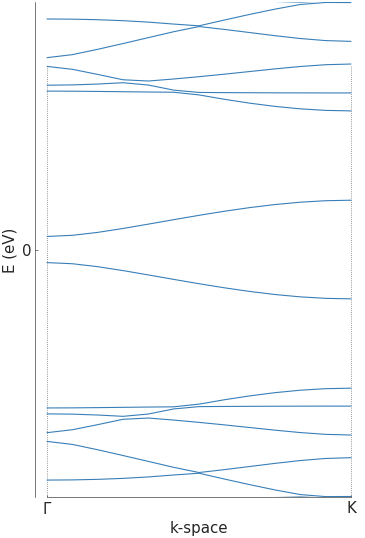

In [12]:
energy(arm_gra_A)

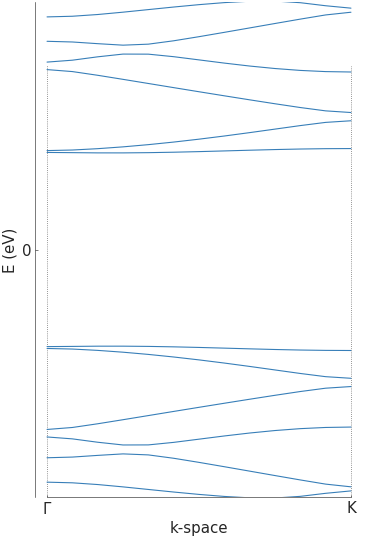

In [13]:
energy(arm_gra_B)